In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
#Importing Training and Testing data

pd_train = pd.read_csv("trainregression.csv")
pd_test = pd.read_csv("testRegression.csv")

pd_train.head()

,X,R
0,0.01,-0.2730
1,0.02,-0.1170
2,0.03,-0.3090
3,0.04,0.0306
4,0.05,-0.0802


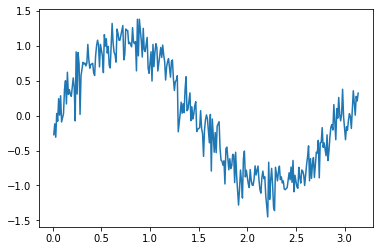

In [18]:
#Loading Training data into arrays
x = np.array(pd_train["X"])
y = np.array(pd_train["R"])

#Loading Testing data int arrays
x1 = np.array(pd_test["X"])
y1 = np.array(pd_test["R"])

#Testing data plot
plt.plot(x,y)

In [40]:
#Linear model
def linearVar():
    m = x.shape[0]
    sum_x = np.sum(x)
    sq_x = np.sum(np.square(x))

    sum_y = np.sum(y)
    pro_xy = np.sum(np.dot(x,y))
    
    a = np.array([[m,sum_x],[sum_x,sq_x]])
    b = np.array([[sum_y],[pro_xy]]) 
    
    a_inv = np.linalg.inv(a)
    theeta = np.dot(a_inv,b)
    predictions = theeta[0]+theeta[1]*x1
    loss = np.sum(np.square(predictions-y1))/(2*m)
    
    plt.plot(x1,y1)
    plt.plot(x1,predictions)
    print(loss)

0.017861889585638297


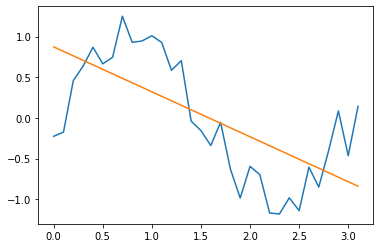

In [46]:
linearVar()

In [47]:
#Quadratic model
def QuadVar():
    m = x.shape[0]
    sum_x = np.sum(x)
    sq_x = np.sum(np.square(x))
    cube_x = np.sum(np.power(x,3))
    quad_x = np.sum(np.power(x,4))
    
    sum_y = np.sum(y)
    pro_xy = np.sum(np.dot(x,y))
    sq_pro_xy = np.sum(np.dot(np.square(x),y))
    
    matrix_A = np.array([[m,sum_x,sq_x],[sum_x,sq_x,cube_x],[sq_x,cube_x,quad_x]])
    matrix_B = np.array([[sum_y],[pro_xy],[sq_pro_xy]])
    
    a_inverse = np.linalg.inv(matrix_A)
    theeta = np.dot(a_inverse,matrix_B)
    
    predictions = theeta[0]+theeta[1]*x1+theeta[2]*x1*x1
    
    loss = np.sum(np.square(predictions-y1))/(2*m)
    
    plt.plot(x1,y1)
    plt.plot(x1,predictions)
    print(loss)

0.018433458428247552


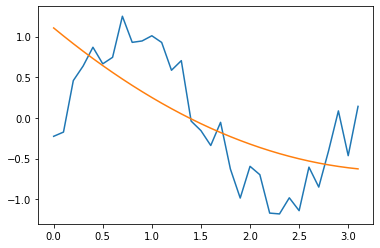

In [48]:
QuadVar()

In [49]:
#Cubic model
def CubeVar():
    #With 4 variables
    m = x.shape[0]                      #size of m
    sum_x = np.sum(x)                   #sum of x
    sq_x = np.sum(np.square(x))         #sum of x_square
    cube_x = np.sum(np.power(x,3))      # Soo on
    quad_x = np.sum(np.power(x,4))
    penta_x = np.sum(np.power(x,5))
    hexa_x = np.sum(np.power(x,6))


    sum_y = np.sum(y)                           #sum of y
    pro_xy = np.dot(x,y)                        #sum of xy
    sq_pro_xy = np.dot(np.square(x),y)          #sum of x_sq, y
    cu_pro_xy = np.dot(np.power(x,3),y)         #sum of x_cube,y

    
    #Matrix A & Matrix B
    
    matrix_A = np.array([[m,sum_x,sq_x,cube_x],[sum_x,sq_x,cube_x,quad_x],[sq_x,cube_x,quad_x,penta_x],[cube_x,quad_x,penta_x,hexa_x]])
    matrix_B = np.array([[sum_y],[pro_xy],[sq_pro_xy],[cu_pro_xy]])
    
    #Matrix A_Inverse to calculate (A_inv*B)
    a_inverse = np.linalg.inv(matrix_A)
    
    #VALUE OF THEETA1,THEETA2, THEETA3
    theeta = np.dot(a_inverse,matrix_B)
    
    #PREDICTIONS
    predictions = theeta[0]+theeta[1]*x1+theeta[2]*x1*x1+theeta[3]*x1*x1*x1
    
    #LOSS FUNCTION
    loss = np.sum(np.square(predictions-y1))/(2*m)

    #PLOTING
    plt.plot(x1,y1)
    plt.plot(x1,predictions)
    print(loss)


0.0029140385973684575


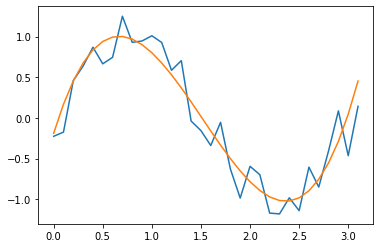

In [50]:
CubeVar()